# EDA for all signal experiments

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
files = ["S1-ADL1_sensors_data.txt", "S1-ADL2_sensors_data.txt", "S1-ADL3_sensors_data.txt", "S1-ADL4_sensors_data.txt", "S1-ADL5_sensors_data.txt", "S2-ADL1_sensors_data.txt", "S2-ADL2_sensors_data.txt", "S2-ADL3_sensors_data.txt", "S2-ADL4_sensors_data.txt", "S2-ADL5_sensors_data.txt", "S3-ADL1_sensors_data.txt", "S3-ADL2_sensors_data.txt", "S3-ADL3_sensors_data.txt", "S3-ADL4_sensors_data.txt", "S3-ADL5_sensors_data.txt", "S4-ADL1_sensors_data.txt", "S4-ADL2_sensors_data.txt", "S4-ADL3_sensors_data.txt", "S4-ADL4_sensors_data.txt", "S4-ADL5_sensors_data.txt"]

In [5]:
df = pd.DataFrame()

In [6]:
PATH = "/content/drive/MyDrive/Colab Notebooks/פרויקט גמר/קבצים/"
for f in files:
  file_path = PATH + f
  df1 = pd.read_csv(file_path,sep=" ",header=None)
  df = pd.concat([df, df1], ignore_index=True)

In [ ]:
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/פרויקט גמר/קבצים/combined_data.csv', index=False)

In [62]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0,87.0,975.0,-287.0,11.0,1001.0,163.0,95.0,975.0,152.0,...,5789.0,2907.0,1447.0,0,0,0,0,0,0,0
1,33,124.0,978.0,-389.0,-7.0,1014.0,199.0,124.0,968.0,123.0,...,5789.0,2908.0,1443.0,0,0,0,0,0,0,0
2,67,102.0,996.0,-440.0,-49.0,1024.0,193.0,127.0,1001.0,113.0,...,5789.0,2910.0,1440.0,0,0,0,0,0,0,0
3,100,59.0,861.0,-384.0,-9.0,1023.0,202.0,110.0,1007.0,106.0,...,5789.0,2912.0,1440.0,0,0,0,0,0,0,0
4,133,119.0,946.0,-426.0,-22.0,1026.0,188.0,98.0,1001.0,92.0,...,5791.0,2915.0,1442.0,0,0,0,0,0,0,0


In [7]:
X = df.loc[:,0:242]
X.shape

(644953, 243)

In [32]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
0,0,87.0,975.0,-287.0,11.0,1001.0,163.0,95.0,975.0,152.0,...,1265.0,5858.0,2707.0,1134.0,6294.0,2663.0,1533.0,5789.0,2907.0,1447.0
1,33,124.0,978.0,-389.0,-7.0,1014.0,199.0,124.0,968.0,123.0,...,1267.0,5905.0,2708.0,1155.0,6294.0,2664.0,1532.0,5789.0,2908.0,1443.0
2,67,102.0,996.0,-440.0,-49.0,1024.0,193.0,127.0,1001.0,113.0,...,1268.0,5948.0,2710.0,1175.0,6295.0,2664.0,1531.0,5789.0,2910.0,1440.0
3,100,59.0,861.0,-384.0,-9.0,1023.0,202.0,110.0,1007.0,106.0,...,1266.0,5986.0,2711.0,1192.0,6296.0,2664.0,1530.0,5789.0,2912.0,1440.0
4,133,119.0,946.0,-426.0,-22.0,1026.0,188.0,98.0,1001.0,92.0,...,1263.0,6018.0,2712.0,1205.0,6299.0,2664.0,1529.0,5791.0,2915.0,1442.0


In [8]:
Y = df.loc[:,243:]
Y.shape

(644953, 7)

In [67]:
Y[243].value_counts()

1    222625
0    147303
2    130605
4    118731
5     25689
Name: 243, dtype: int64

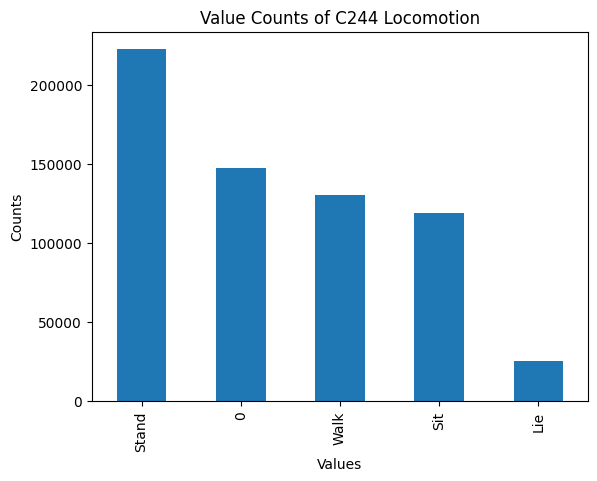

In [68]:
Y[243].replace({1: 'Stand', 2: 'Walk', 4: 'Sit', 5: 'Lie', 0: '0'}).value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Value Counts of C244 Locomotion')
plt.show()

In [ ]:
Y[244].value_counts()

105    173743
103    137058
0      114935
102     88714
104     86298
101     44205
Name: 244, dtype: int64

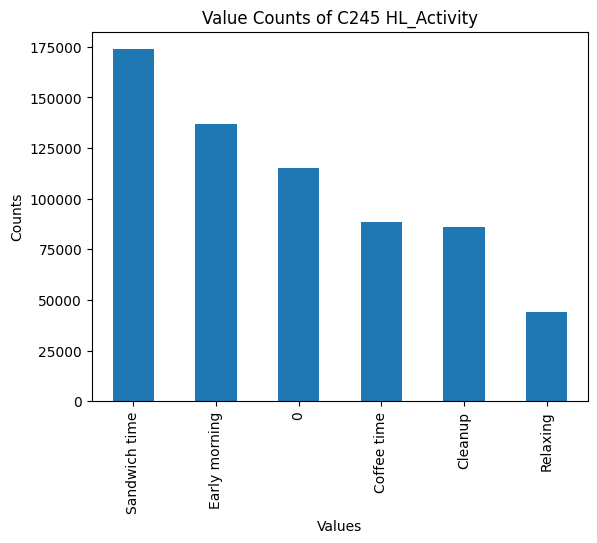

In [80]:
Y[244].replace({101: 'Relaxing', 102: 'Coffee time', 103: 'Early morning', 104: 'Cleanup', 105: 'Sandwich time', 0: '0'}).value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Value Counts of C245 HL_Activity')
plt.show()

In [ ]:
Y[245].value_counts()

0      504502
213     85422
205     17224
204     10810
206     10559
212     10259
209      3374
208      1003
210       933
207       727
203        70
201        70
Name: 245, dtype: int64

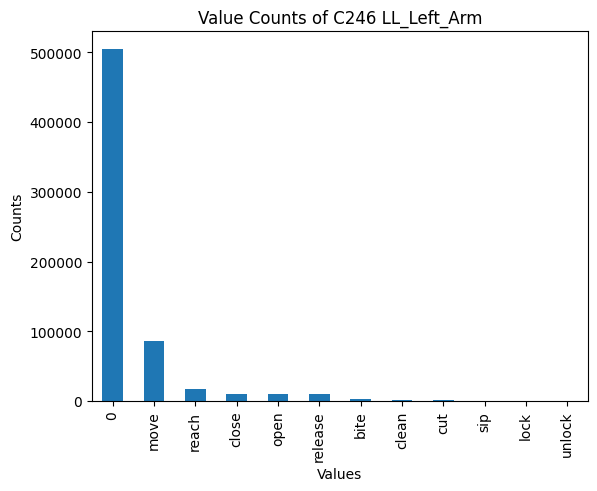

In [9]:
Y[245].replace({201: 'unlock', 203: 'lock', 204: 'close', 205: 'reach', 206: 'open', 207: 'sip', 208: 'clean', 209: 'bite', 210: 'cut', 212: 'release', 213: 'move', 0: '0'}).value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Value Counts of C246 LL_Left_Arm')
plt.show()

In [ ]:
Y[246].value_counts()

0      504502
303     31409
302     18981
320     16262
314     10183
321      9760
318      7482
304      7253
313      5411
301      5365
307      4222
310      4140
309      3456
305      3376
322      3108
308      2451
319      1543
311      1441
312      1173
306       974
316       763
315       753
323       666
317       279
Name: 246, dtype: int64

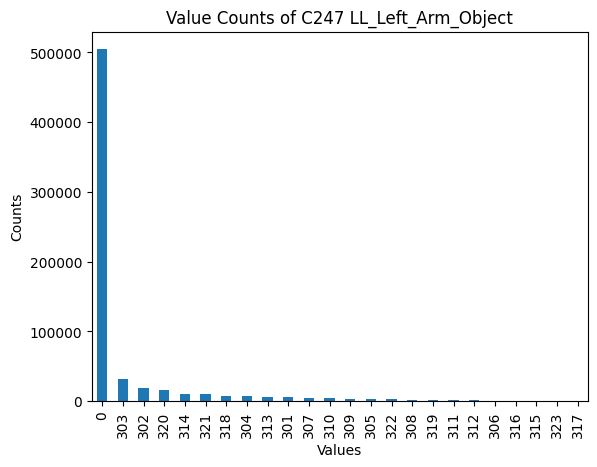

In [11]:
Y[246].value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Value Counts of C247 LL_Left_Arm_Object')
plt.show()

In [ ]:
Y[247].value_counts()

0      400307
413    115501
405     35560
412     20911
406     15327
404     14163
407     12190
410      9240
408      5729
411      5460
402      4489
409      3817
403      1242
401      1017
Name: 247, dtype: int64

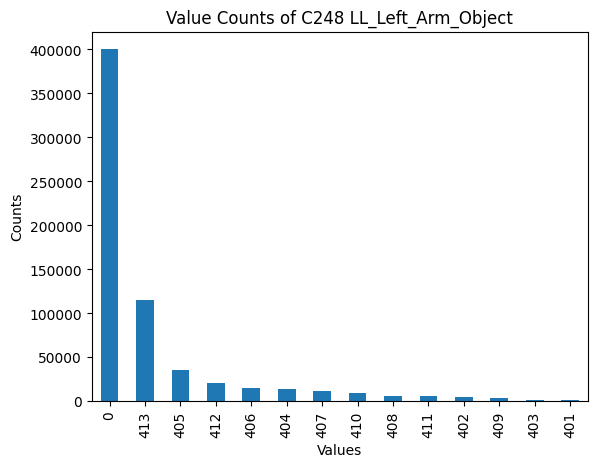

In [12]:
Y[247].value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Value Counts of C248 LL_Left_Arm_Object')
plt.show()

In [ ]:
Y[248].value_counts()

0      400307
521     37326
503     29997
513     25010
502     17000
507     13992
514     12250
510     11703
509     11457
517     11000
516     10324
522      9043
501      8948
518      7513
505      6160
512      6014
508      5250
504      4723
519      4547
520      3954
511      3506
506      3323
515      1298
523       308
Name: 248, dtype: int64

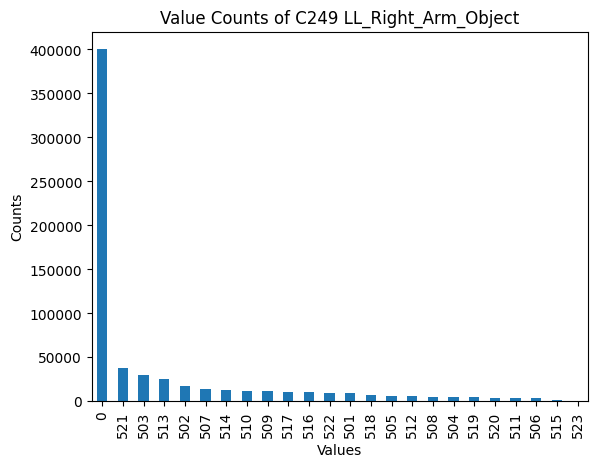

In [13]:
Y[248].value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Value Counts of C249 LL_Right_Arm_Object')
plt.show()

In [ ]:
Y[249].value_counts()

0         539468
407521     22941
406520     11308
404520     10105
408512      6629
406517      6284
406516      6235
404517      5258
404516      4849
406505      4575
404505      4405
405506      4388
406508      3912
404508      3777
406519      3064
404519      2867
406511      2718
404511      2170
Name: 249, dtype: int64

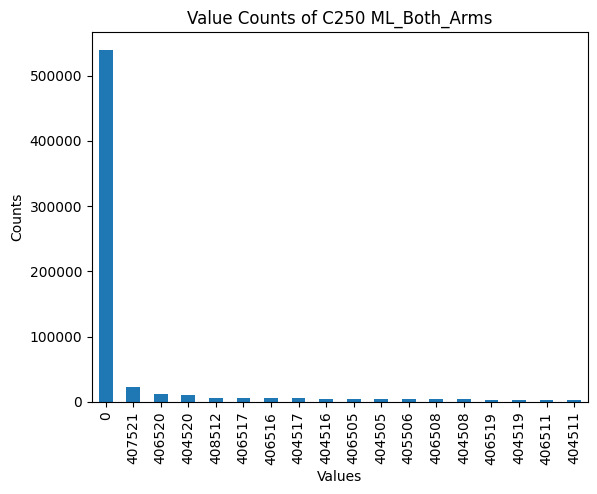

In [14]:
Y[249].value_counts().plot(kind='bar')
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Value Counts of C250 ML_Both_Arms')
plt.show()

In [34]:
X.isna().sum()

0          0
1      46922
2      46922
3      46922
4      22020
       ...  
238    18902
239    18902
240    18902
241    18902
242    18902
Length: 243, dtype: int64

In [ ]:
# HIP = pd.DataFrame()

# # RKN = df.loc[:, ["1", "2", "3", "19", "20", "21"]]
# HIP = df[[4, 5, 6]]
# LUA = [7, 8, 9, 28, 29, 30, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
# RUA = [10, 11, 12, 25, 26, 27, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
# LH = [13, 14, 15]
# BACK = [16, 17, 18, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
# RWR = [22, 23, 24]
# LWR = [31, 32, 33]
# RH = [34, 35, 36]
# RLA = [63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
# LLA = [89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
# # accessories = list(range(102, 194), 210, 211, 212)
# # switch = list(range(194, 206))
# # DOOR = list(207, 208, 209, 213, 214, 215, range(219, 227))
# # elect = [216, 217, 218, 228, 229, 230]
# # tags = list(range(231, 242))

In [ ]:
# print(df.describe())
# print(df[HIP].describe())
# print(df[LUA].describe())
# print(df[RUA].describe())
# print(df[LH].describe())
# print(df[BACK].describe())
# print(df[RWR].describe())

In [ ]:
X = X.fillna(0)

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

### Check the principal components in a scatterplot graph

<Axes: xlabel='PC1', ylabel='PC2'>

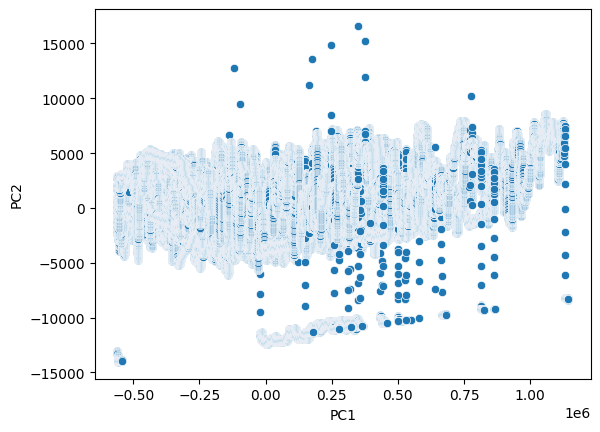

In [ ]:
sns.scatterplot(x=principalDf['PC1'],y=principalDf['PC2'])

### Principal components with color for the labels

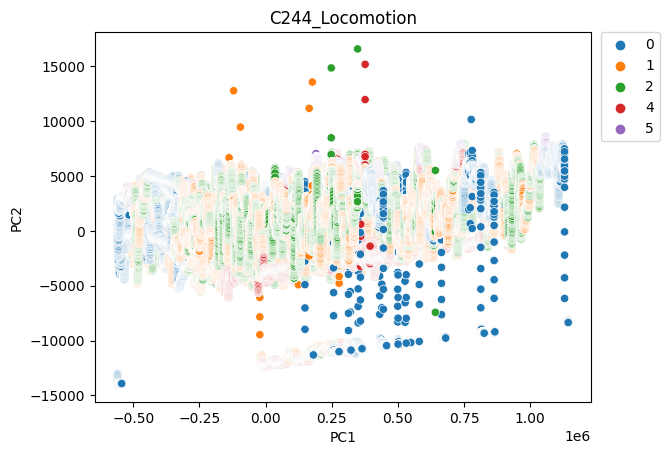

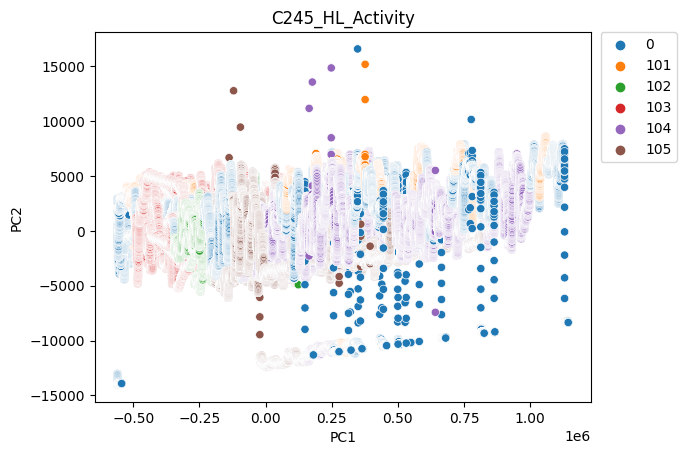

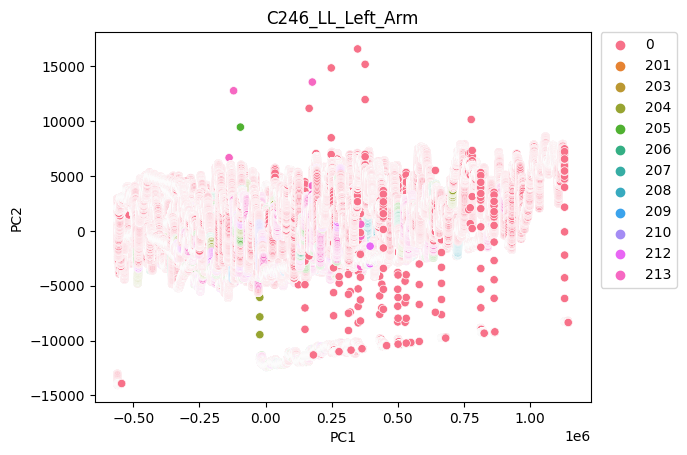

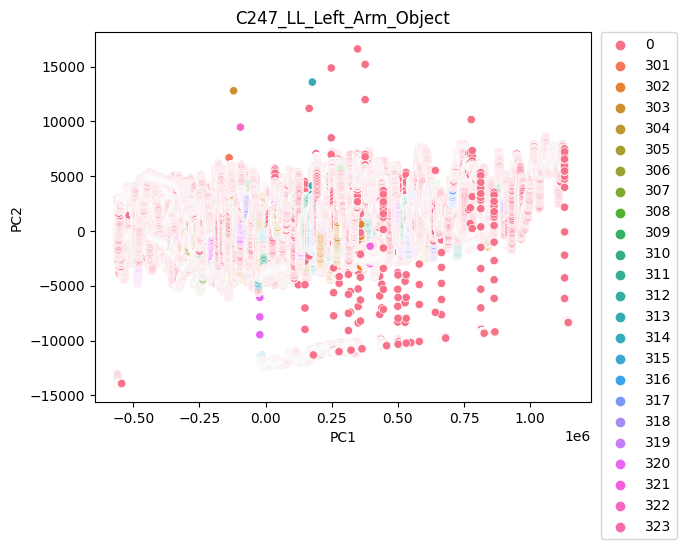

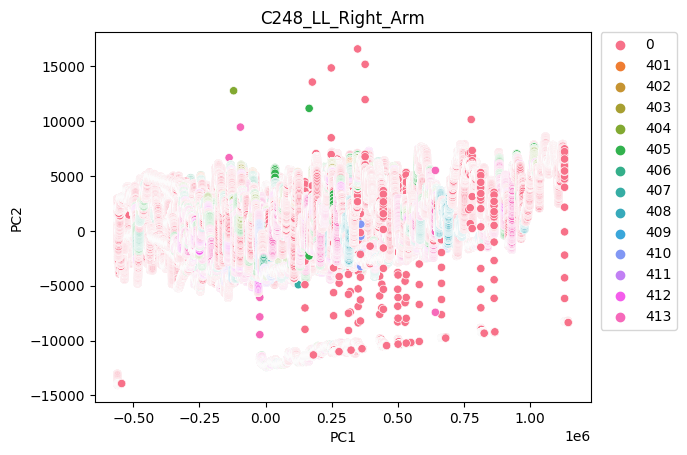

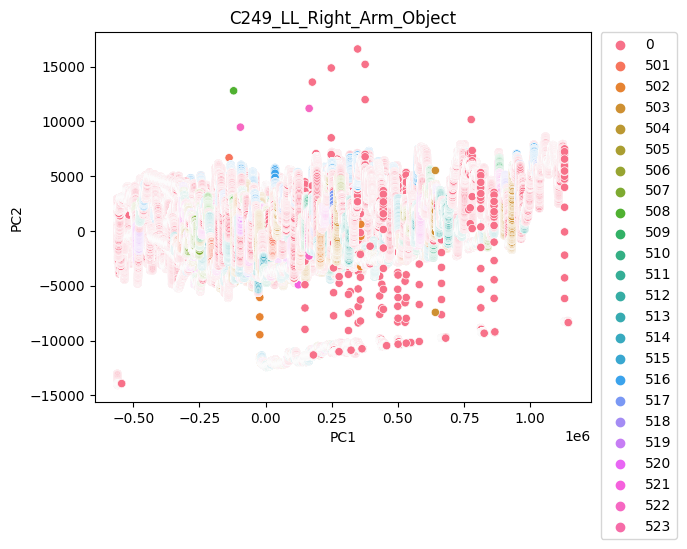

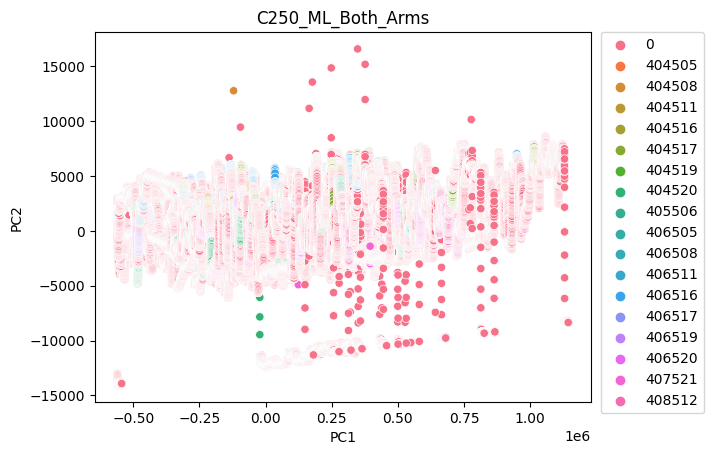

In [ ]:
labels = ["C244_Locomotion", "C245_HL_Activity","C246_LL_Left_Arm", "C247_LL_Left_Arm_Object", "C248_LL_Right_Arm", "C249_LL_Right_Arm_Object", "C250_ML_Both_Arms"]
y=243
for l in labels:
  sns.scatterplot(x=principalDf['PC1'],y=principalDf['PC2'],hue=Y[y].astype('category'))
  plt.title(l)
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.show()
  y+=1

### Now we will check for patterns in the dataset using a heatmap

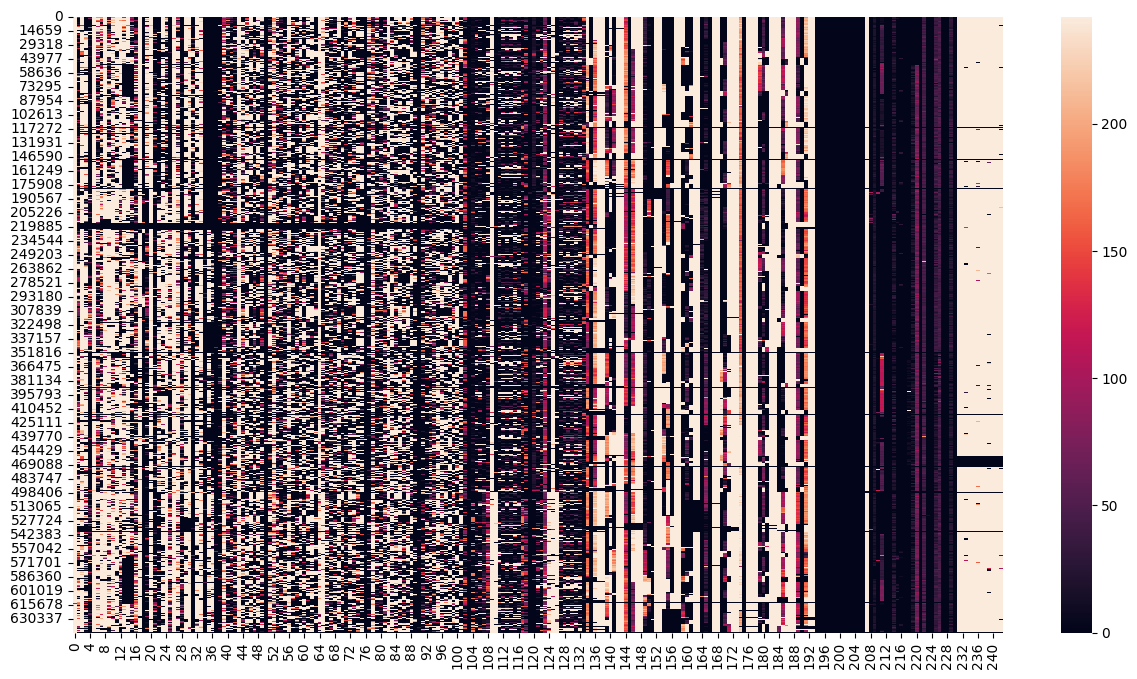

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(X, vmin=0, vmax=242)
plt.show()

### Scaling the data with MinMax transformation

In [ ]:
normalized_X=(X-X.min())/(X.max()-X.min())

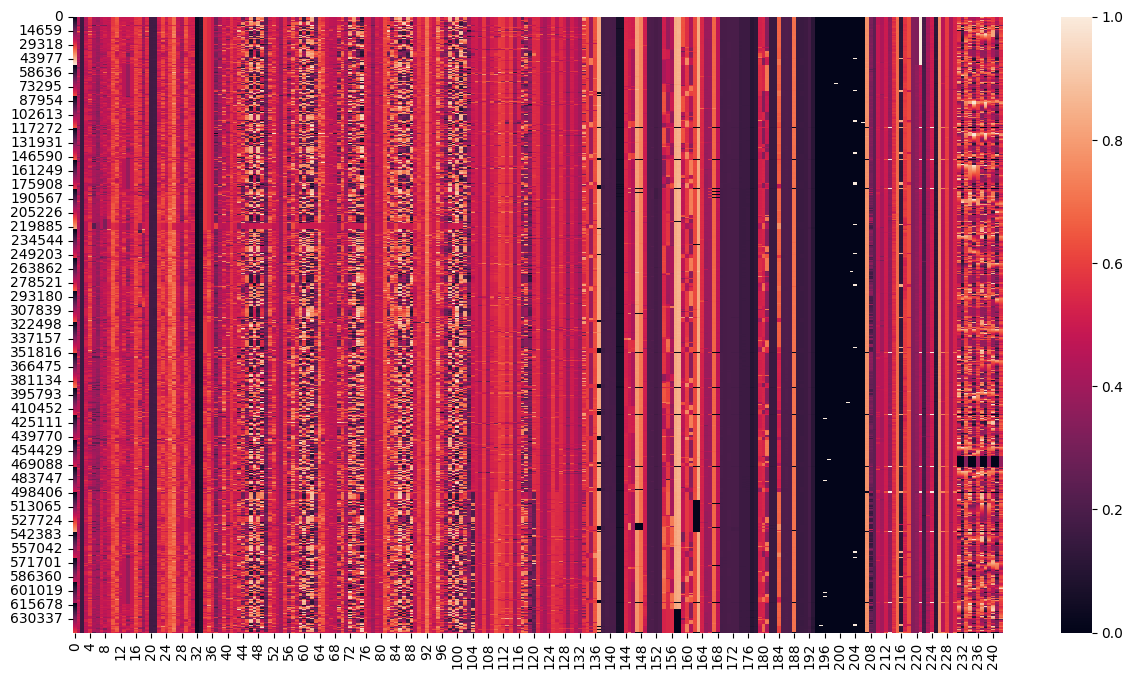

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(normalized_X, vmin=0, vmax=1)
plt.show()